## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn import metrics
from sklearn.model_selection import train_test_split

dataset = datasets.load_wine()
print(dataset['DESCR'])
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [6]:
# fit a tree.DecisionTreeClassifier() model to the data
from sklearn import tree  
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions
expected_y  = y_test
predicted_y = model.predict(X_test)

# summarize the fit of the model
print('tree.DecisionTreeClassifier(): ')
print(metrics.classification_report(expected_y, predicted_y, 
               target_names=dataset.target_names))
print(metrics.confusion_matrix(expected_y, predicted_y))


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
tree.DecisionTreeClassifier(): 
              precision    recall  f1-score   support

     class_0       0.88      1.00      0.93        14
     class_1       1.00      0.92      0.96        24
     class_2       1.00      1.00      1.00         7

    accuracy                           0.96        45
   macro avg       0.96      0.97      0.96        45
weighted avg       0.96      0.96      0.96        45

[[14  0  0]
 [ 2 22  0]
 [ 0  0  7]]


In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs',multi_class='multinomial')
lr.fit(X_train, y_train)

# make predictions
expected_y  = y_test
predicted_y = lr.predict(X_test)
print(expected_y,predicted_y)

# summarize the fit of the model
print('LogisticRegression(): ')
print(metrics.classification_report(expected_y, predicted_y, 
               target_names=dataset.target_names))
print(metrics.confusion_matrix(expected_y, predicted_y))


[2 0 1 2 2 0 2 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 2 1
 0 2 0 0 2 1 1 0] [2 0 1 2 2 0 2 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 2 1
 0 2 0 0 2 1 1 0]
tree.DecisionTreeClassifier(): 
              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       1.00      0.96      0.98        24
     class_2       1.00      1.00      1.00         7

    accuracy                           0.98        45
   macro avg       0.98      0.99      0.98        45
weighted avg       0.98      0.98      0.98        45

[[14  0  0]
 [ 1 23  0]
 [ 0  0  7]]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


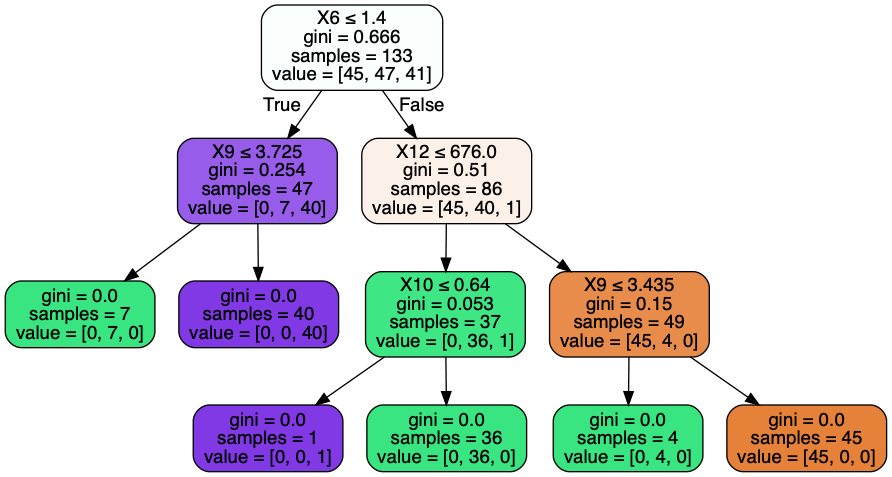

In [18]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())